In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler


In [2]:
df=pd.read_csv("./Rainfall.csv")

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [7]:
df.isna().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [8]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [9]:
df.rename(str.strip,axis='columns',inplace=True)

In [10]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [11]:
df['windspeed'].fillna(df['windspeed'].mean(),inplace=True)
df['winddirection'].fillna(df['winddirection'].mean(),inplace=True)

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_3992\2718128997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['windspeed'].fillna(df['windspeed'].mean(),inplace=True)
C:\Users\vishn.000\AppData\Local\Temp\ipykernel_3992\2718128997.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [12]:
df.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

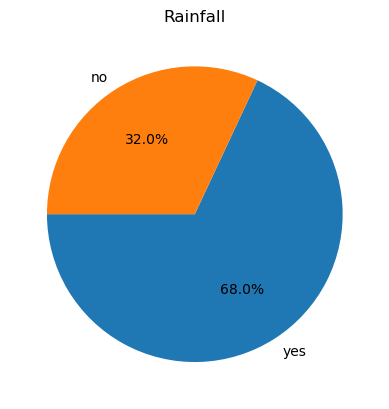

In [13]:
plt.pie(df['rainfall'].value_counts().values,labels=df['rainfall'].value_counts().index,startangle=180,autopct='%1.1f%%')
plt.title('Rainfall')
plt.show()

In [14]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


In [15]:
para=list(df.select_dtypes(include=np.number).columns)

In [16]:
para.remove('day')

In [17]:
para


['pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed']

In [18]:
len(para)

10

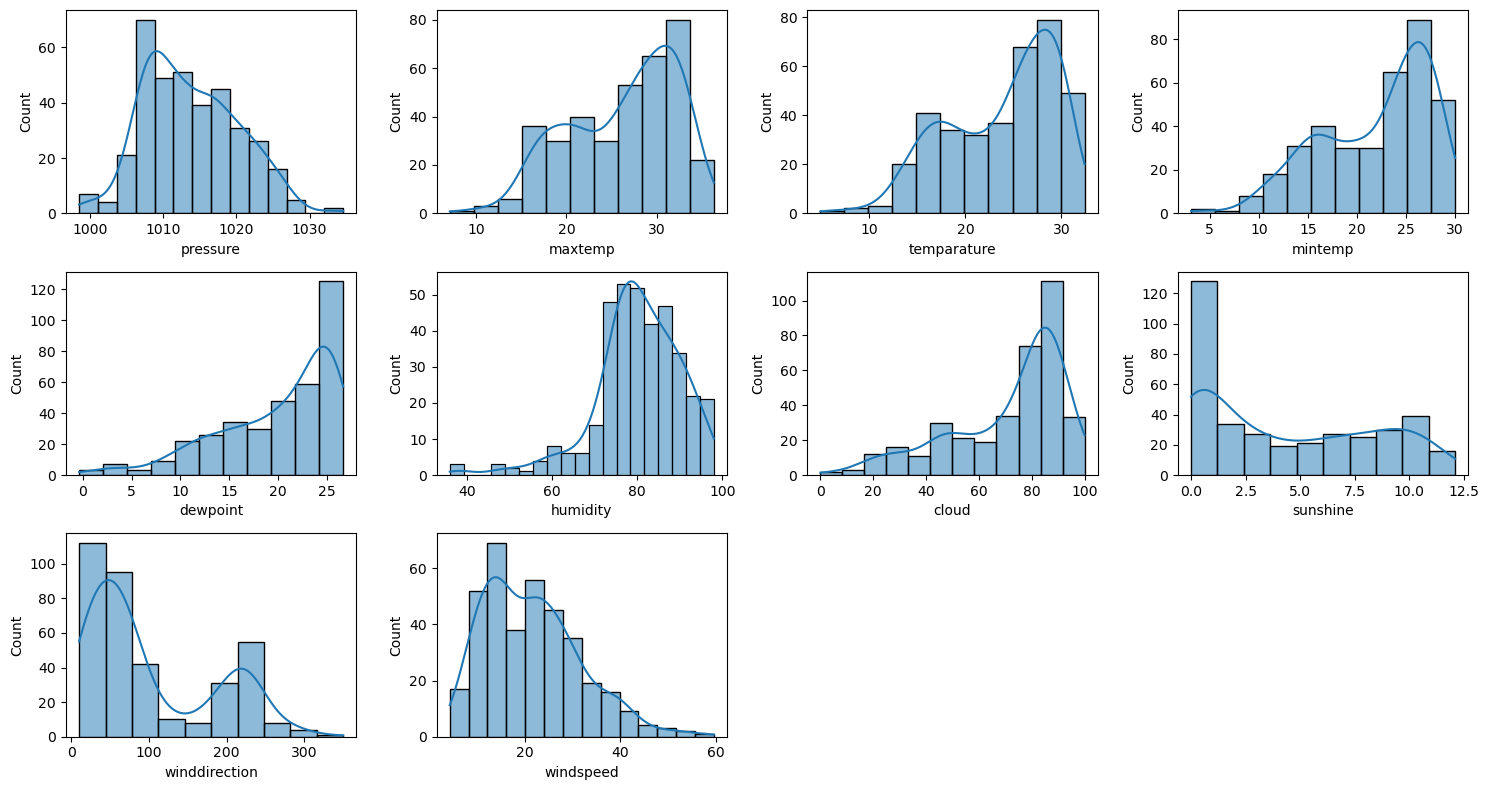

In [19]:

plt.figure(figsize=(15,8))

for i,col in enumerate(para):
    plt.subplot(3,4,i+1)
    sns.histplot(df[col],kde=True)
    
plt.tight_layout()    
plt.show()

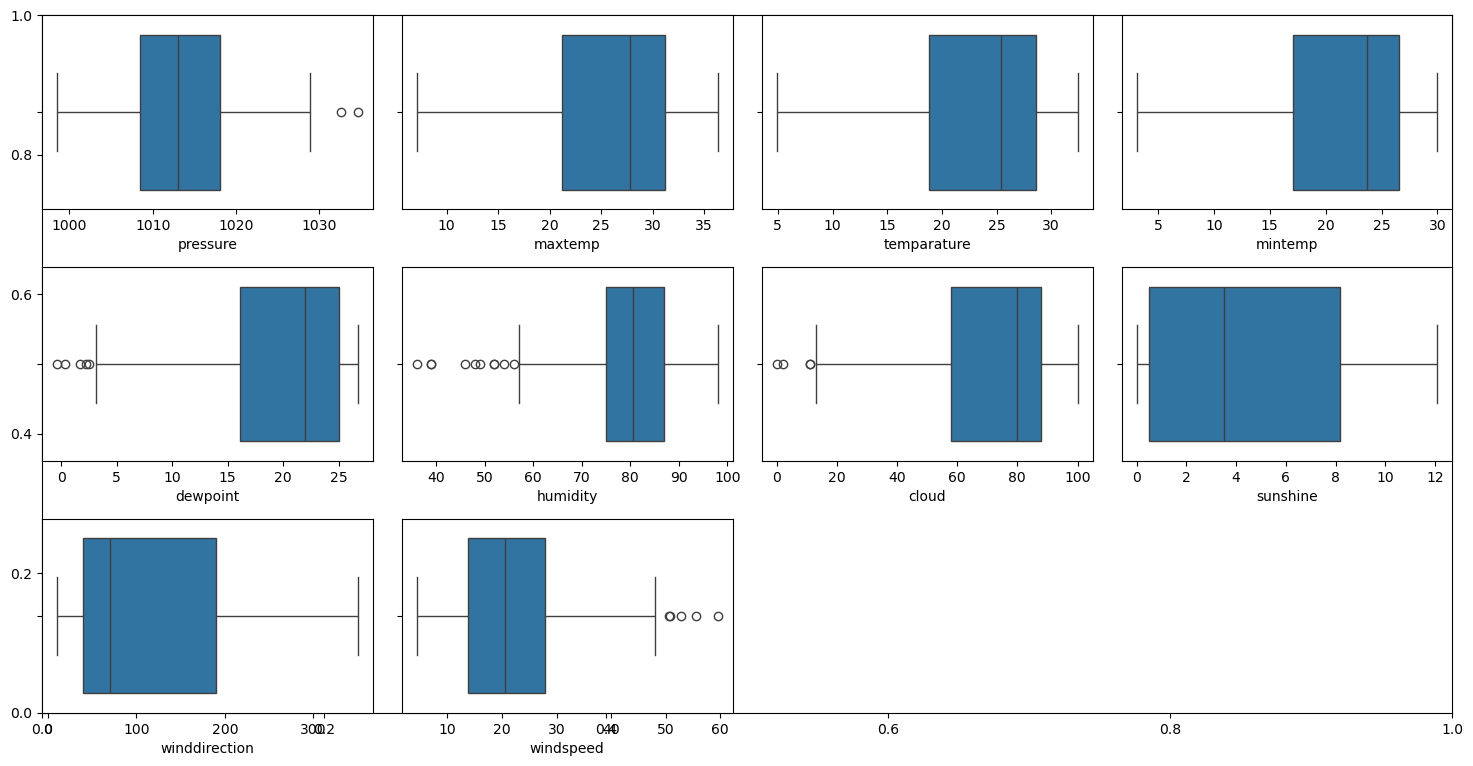

In [20]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(para):
  plt.subplot(3,4, i + 1)
  sns.boxplot(df[col],orient="h")
plt.tight_layout()
plt.show()

In [21]:
df.replace({'yes':1, 'no':0}, inplace=True)

C:\Users\vishn.000\AppData\Local\Temp\ipykernel_3992\2314881541.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes':1, 'no':0}, inplace=True)


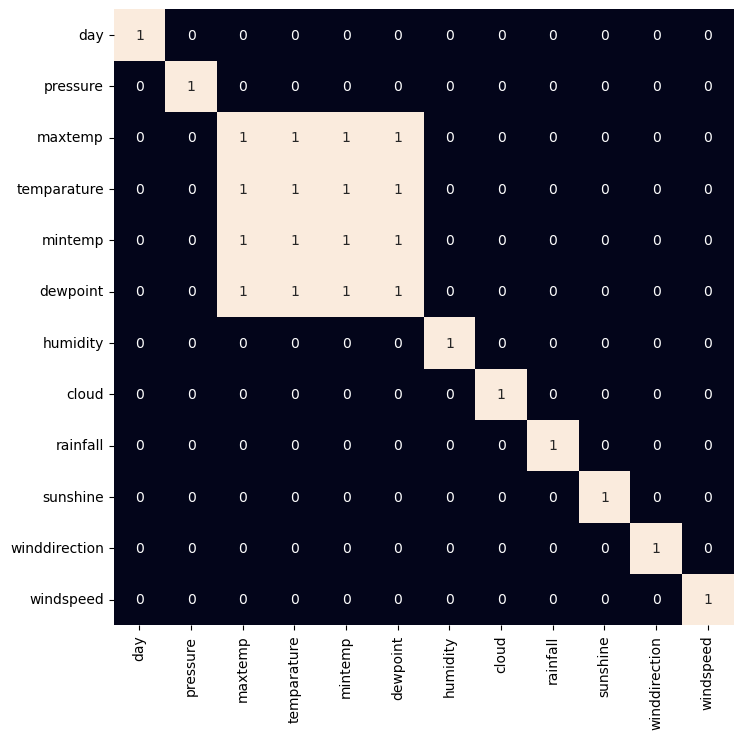

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [23]:
df.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [24]:
df.head()

,day,pressure,temparature,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,18.3,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,18.9,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,19.3,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,20.6,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,20.7,19.9,95,81,1,0.0,40.0,13.7


In [25]:
x=df.drop(['day','rainfall'],axis=1)
y=df['rainfall']

In [26]:
x.shape

(366, 8)

In [27]:
y.shape

(366,)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [29]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=22)
X, Y = ros.fit_resample(x_train, y_train)

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_test= scaler.transform(x_test)

In [31]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]

for i in range(3):
  models[i].fit(X, Y)

  print(f'{models[i]} : ')

  train_preds = models[i].predict_proba(X) 
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))

  val_preds = models[i].predict_proba(x_test) 
  print('Validation Accuracy : ', metrics.roc_auc_score(y_test, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.8784121613090577
Validation Accuracy :  0.9158333333333334

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.81

SVC(probability=True) : 
Training Accuracy :  0.895305674099139
Validation Acc

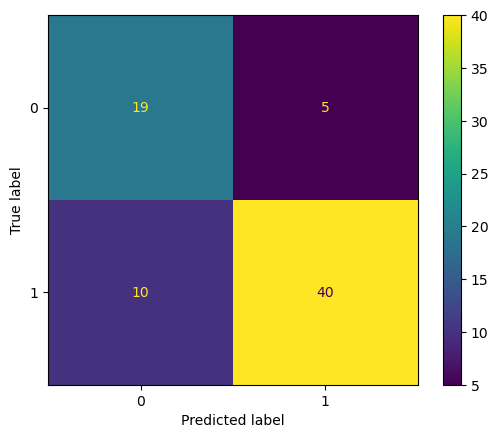

In [32]:
ConfusionMatrixDisplay.from_estimator(models[0], x_test,y_test)
plt.show()

In [33]:
print(metrics.classification_report(y_test, models[0].predict(x_test)))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        24
           1       0.89      0.80      0.84        50

    accuracy                           0.80        74
   macro avg       0.77      0.80      0.78        74
weighted avg       0.81      0.80      0.80        74

